In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import math 
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

<b> Data 2014 and 2015

In [3]:
file1 = pd.read_csv('kc_house_data.csv')
house_df=file1
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<b> Removing "T000000" from date

In [4]:
house_df['date']=house_df['date'].str.extract('(^\d*)')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<b> Removing separate the date "-"

In [5]:
house_df['date'] = pd.to_datetime(house_df['date'], format='%Y%m%d')

In [6]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<b> Split date in three different columns

In [7]:
house_df['day'] = house_df['date'].dt.day
house_df['month'] = house_df['date'].dt.month
house_df['year'] = house_df['date'].dt.year

In [8]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,21,5,2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,23,2,2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,23,6,2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,16,1,2015


<b> Create a dataframe 2014

In [9]:
df1_2014 = house_df[house_df['year'] == 2014]
df1_2014

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,12,5,2014
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,27,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,0,0,...,2003,0,98065,47.5389,-121.881,2270,5731,25,8,2014
21605,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,...,2014,0,98056,47.5137,-122.167,2520,6023,14,10,2014
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,21,5,2014
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,23,6,2014


<b> Create a dataframe 2015

In [10]:
df1_2015 = house_df[house_df['year'] == 2015]
df1_2015

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015
7,2008000270,2015-01-15,291850.0,3,1.5,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,15,1,2015
8,2414600126,2015-04-15,229500.0,3,1.0,1780,7470,1.0,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,15,4,2015
9,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,12,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,2015-01-26,429000.0,3,2.0,1490,1126,3.0,0,0,...,2014,0,98144,47.5699,-122.288,1400,1230,26,1,2015
21606,7936000429,2015-03-26,1007500.0,4,3.5,3510,7200,2.0,0,0,...,2009,0,98136,47.5537,-122.398,2050,6200,26,3,2015
21607,2997800021,2015-02-19,475000.0,3,2.5,1310,1294,2.0,0,0,...,2008,0,98116,47.5773,-122.409,1330,1265,19,2,2015
21609,6600060120,2015-02-23,400000.0,4,2.5,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,23,2,2015


<b> Description of 2014

In [11]:
df1_2014.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
count,1.463300e+04,1.463300e+04,14633.000000,14633.000000,14633.000000,1.463300e+04,14633.000000,14633.000000,14633.000000,14633.000000,...,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.0
mean,4.560180e+09,5.391814e+05,3.377161,2.128904,2098.319073,1.495053e+04,1.502631,0.007791,0.233582,3.429919,...,1970.933985,90.978883,98077.895852,47.562848,-122.213923,1996.840498,12770.057473,15.724595,8.257774,2014.0
std,2.873192e+09,3.691627e+05,0.942636,0.771628,929.621019,3.752184e+04,0.540567,0.087923,0.767346,0.664473,...,29.489005,416.334428,53.407146,0.137514,0.141430,691.376543,26107.338627,8.561871,2.208879,0.0
min,1.000102e+06,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000,1.000000,5.000000,2014.0
25%,2.115200e+09,3.200000e+05,3.000000,1.750000,1440.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.477600,-122.328000,1490.000000,5099.000000,9.000000,6.000000,2014.0
50%,3.902100e+09,4.500000e+05,3.000000,2.250000,1930.000000,7.634000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.576400,-122.231000,1850.000000,7620.000000,16.000000,8.000000,2014.0
75%,7.298900e+09,6.450000e+05,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98117.000000,47.678900,-122.125000,2380.000000,10125.000000,23.000000,10.000000,2014.0
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,560617.000000,31.000000,12.000000,2014.0


In [12]:
df1_2014.month.unique()

array([10, 12,  5,  6,  7,  8, 11,  9])

<b> Description of 2015

In [13]:
df1_2015.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
count,6.980000e+03,6.980000e+03,6980.000000,6980.00000,6980.000000,6.980000e+03,6980.000000,6980.000000,6980.000000,6980.000000,...,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.000000,6980.0
mean,4.622485e+09,5.419890e+05,3.357593,2.08510,2041.285100,1.543492e+04,1.476862,0.007020,0.235817,3.366476,...,1971.154298,70.614900,98078.031948,47.554192,-122.213841,1964.984527,12765.097564,15.611891,3.045415,2015.0
std,2.883375e+09,3.628418e+05,0.903056,0.76629,893.383106,4.859022e+04,0.538397,0.083497,0.764209,0.618823,...,29.131127,368.720053,53.713363,0.140568,0.139569,672.209049,29658.874158,8.786653,1.194785,0.0
min,1.000102e+06,7.500000e+04,0.000000,0.00000,390.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.162200,-122.511000,399.000000,748.000000,1.000000,1.000000,2015.0
25%,2.131701e+09,3.249500e+05,3.000000,1.50000,1400.000000,5.059500e+03,1.000000,0.000000,0.000000,3.000000,...,1952.000000,0.000000,98033.000000,47.456475,-122.328000,1480.000000,5120.000000,8.000000,2.000000,2015.0
50%,3.935900e+09,4.505000e+05,3.000000,2.25000,1878.000000,7.575500e+03,1.000000,0.000000,0.000000,3.000000,...,1974.000000,0.000000,98065.000000,47.563650,-122.228500,1820.000000,7620.000000,16.000000,3.000000,2015.0
75%,7.417250e+09,6.432375e+05,4.000000,2.50000,2500.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.675225,-122.125000,2330.000000,10000.000000,24.000000,4.000000,2015.0
max,9.842300e+09,5.350000e+06,9.000000,6.50000,8000.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,31.000000,5.000000,2015.0


In [14]:
df1_2015.month.unique()

array([2, 1, 4, 3, 5])

- 14633 house sold in 2014 with 8 months of record;
- 6980 house sold in 2015 with 5 months of record;
- Even the two dataframe have two different amount of data and the observed months are different, the mean and the standard deviation of the two years are almost the same.

In [15]:
#house_df['date']=house_df['date'].str.extract('(^\d*)')
#house_df

In [16]:
#house_df['date'] = pd.to_datetime(house_df['date'], format='%Y%m%d')

In [17]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,15.688197,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,8.635063,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,8.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,16.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,23.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,31.000000,12.000000,2015.000000


In [18]:
#house_df["yr_renovated"].value_counts()

<b> Removing outliers using 1.5*IQR technique for all numerical columns.


In [19]:
def outliers(df, ft):
    Q1 = house_df[ft].quantile(0.25)
    Q3 = house_df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft]> upper_bound)]
    
    return ls

In [20]:
index_list = []
for x in ['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot','floors', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']:
    index_list.extend(outliers(house_df, x))

In [21]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [22]:
house_df = remove(house_df, index_list)

In [23]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,21,5,2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,23,2,2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,23,6,2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,16,1,2015


In [24]:
#filename="cleanedHouseData.csv"

In [25]:
#house_df.to_csv(filename)

In [26]:
house_numerical = house_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built',
 'yr_renovated','sqft_living15','sqft_lot15']]
house_numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287


In [27]:
house_categorical =  house_df[['waterfront',
'view','condition','grade','zipcode','lat',
'long']]
house_categorical

,waterfront,view,condition,grade,zipcode,lat,long
0,0,0,3,7,98178,47.5112,-122.257
1,0,0,3,7,98125,47.7210,-122.319
2,0,0,3,6,98028,47.7379,-122.233
3,0,0,5,7,98136,47.5208,-122.393
4,0,0,3,8,98074,47.6168,-122.045
...,...,...,...,...,...,...,...
21608,0,0,3,8,98103,47.6993,-122.346
21609,0,0,3,8,98146,47.5107,-122.362
21610,0,0,3,7,98144,47.5944,-122.299
21611,0,0,3,8,98027,47.5345,-122.069


<AxesSubplot:>

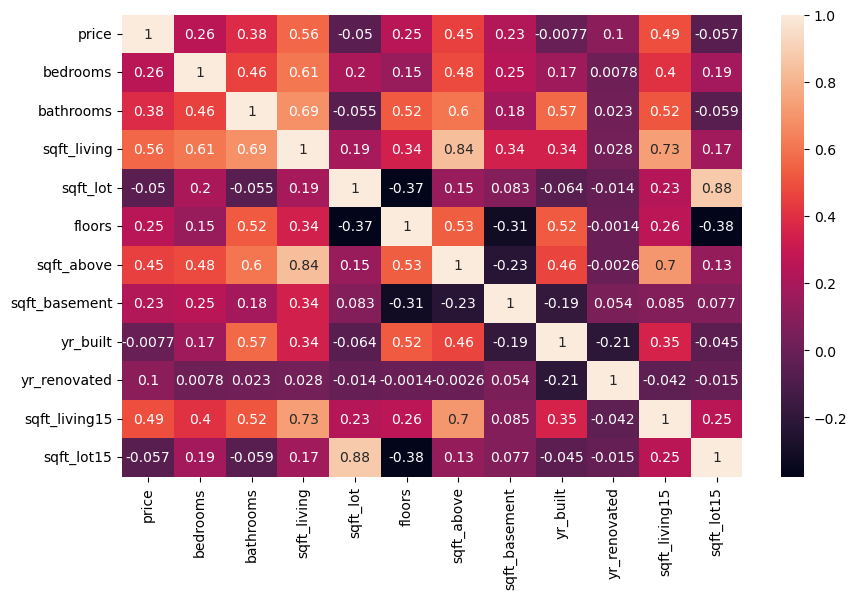

In [28]:
fig_Heatmap = plt.figure(figsize=(10,6))
sns.heatmap(house_numerical.corr(),annot=True)

In [29]:
#house_encoding_df = pd.get_dummies(house_df, columns=["bedrooms", "bathrooms", 'floors', "waterfront","view","condition","grade","zipcode"], prefix= "dmy")

In [30]:
#house_encoding_df

In [31]:
house_df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98003, 98198, 98146, 98038,
       98115, 98107, 98126, 98019, 98103, 98002, 98133, 98092, 98030,
       98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98053,
       98023, 98007, 98148, 98105, 98042, 98008, 98059, 98166, 98122,
       98144, 98004, 98034, 98116, 98118, 98199, 98040, 98032, 98102,
       98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98075,
       98155, 98031, 98024, 98106, 98045, 98072, 98188, 98005, 98033,
       98077, 98055, 98011, 98010, 98014, 98070, 98039])

<b> Group by zipcode and calculate the price and square feet avarage

In [1]:
groupbymean = house_df.groupby('zipcode').mean()
groupbymean

new_df = groupbymean[["price","sqft_living"]]

NameError: name 'house_df' is not defined

In [2733]:
new_df

,price,sqft_living
zipcode,,
98001,266931.809028,1857.934028
98002,232292.596774,1589.704301
98003,278516.896825,1818.702381
98004,832069.522059,1921.985294
98005,696405.421569,2198.823529
...,...,...
98177,525999.974093,2006.010363
98178,298322.395062,1653.127572
98188,278505.368852,1715.303279


In [2734]:
zipcode_df_tot = house_df["zipcode"].value_counts().reset_index()
f_df.sort_values('zipcode')
zipcode_df_tot

,index,zipcode
0,98103,560
1,98115,538
2,98117,516
3,98052,492
4,98034,488
...,...,...
65,98014,39
66,98077,32
67,98024,23
68,98070,20


In [2735]:
zipcode_df_tot = house_df["zipcode"].value_counts().reset_index()
zipcode_df_tot.sort_values("index")

,index,zipcode
23,98001,288
45,98002,186
27,98003,252
54,98004,136
60,98005,102
...,...,...
42,98177,193
33,98178,243
57,98188,122
34,98198,243


In [2736]:
#std_df = house_df.groupby('zipcode')["price"].std().reset_index()
#std_df

In [2737]:
#f_df['count'] = f_df.groupby(['zipcode'])['price'].transform('count')
f_df["count"] = zipcode_df_tot["zipcode"]
f_df["stdev"] = std_df["price"]



In [2738]:
f_df

,zipcode,price,count,stdev
0,98001,266931.809028,560,75529.785348
1,98002,232292.596774,538,47713.110186
2,98003,278516.896825,516,79865.656710
3,98004,832069.522059,492,141990.243808
4,98005,696405.421569,488,141516.223872
...,...,...,...,...
65,98177,525999.974093,39,158464.673390
66,98178,298322.395062,32,131771.974486
67,98188,278505.368852,23,90930.503296
68,98198,279865.687243,20,109516.259659


In [2739]:
#std_df_sqft_above = house_df.groupby('zipcode')["sqft_above"].std().reset_index()
#std_df_sqft_above

In [2740]:
#mean_df_sqft_above = house_df.groupby('zipcode')["sqft_above"].std().reset_index()
#mean_df_sqft_above

In [2741]:

# Create new columns
#house_df['day'] = house_df['date'].dt.day
#house_df['month'] = house_df['date'].dt.month
#house_df['year'] = house_df['date'].dt.year

In [2742]:
#house_df

In [2743]:
#df_2014 = house_df[house_df['year'] == 2014]
#df_2014

In [2744]:
#df_2015 = house_df[house_df['year'] == 2015]
#df_2015

In [2745]:
#df_2014.describe()

In [2746]:
#df_2015.describe()

In [2747]:
#house_df

In [2748]:
#cat_df = pd.get_dummies(house_df, columns=["bedrooms", "bathrooms", 'floors', "waterfront","view","yr_built","zipcode","month","year"], prefix= "dmy")

In [2749]:
#cat_df

In [2750]:
te_df = house_df[['price', 'sqft_living','sqft_lot', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']].copy()
te_df


,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,0,1340,5650
1,538000.0,2570,7242,2170,400,1690,7639
2,180000.0,770,10000,770,0,2720,8062
3,604000.0,1960,5000,1050,910,1360,5000
4,510000.0,1680,8080,1680,0,1800,7503
...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,1530,0,1530,1509
21609,400000.0,2310,5813,2310,0,1830,7200
21610,402101.0,1020,1350,1020,0,1020,2007
21611,400000.0,1600,2388,1600,0,1410,1287


In [2751]:
test1_df = house_df[['zipcode']].copy()
test1_df

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21608,98103
21609,98146
21610,98144
21611,98027


In [2697]:
ziplist = list(f_df.zipcode.unique())
ziplist

['98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199']

In [2752]:
cate_df = pd.get_dummies(house_df, columns=["zipcode"], prefix= "dmy")
#cate_df = cate_df.astype('int32').dtypes

cate_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,dmy_98146,dmy_98148,dmy_98155,dmy_98166,dmy_98168,dmy_98177,dmy_98178,dmy_98188,dmy_98198,dmy_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2753]:
cate_df.drop(columns=['id','date','yr_renovated','yr_built','yr_renovated','lat','long','day', 'month', 'year',], inplace=True)

In [2754]:
cate_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'dmy_98001',
       'dmy_98002', 'dmy_98003', 'dmy_98004', 'dmy_98005', 'dmy_98006',
       'dmy_98007', 'dmy_98008', 'dmy_98010', 'dmy_98011', 'dmy_98014',
       'dmy_98019', 'dmy_98022', 'dmy_98023', 'dmy_98024', 'dmy_98027',
       'dmy_98028', 'dmy_98029', 'dmy_98030', 'dmy_98031', 'dmy_98032',
       'dmy_98033', 'dmy_98034', 'dmy_98038', 'dmy_98039', 'dmy_98040',
       'dmy_98042', 'dmy_98045', 'dmy_98052', 'dmy_98053', 'dmy_98055',
       'dmy_98056', 'dmy_98058', 'dmy_98059', 'dmy_98065', 'dmy_98070',
       'dmy_98072', 'dmy_98074', 'dmy_98075', 'dmy_98077', 'dmy_98092',
       'dmy_98102', 'dmy_98103', 'dmy_98105', 'dmy_98106', 'dmy_98107',
       'dmy_98108', 'dmy_98109', 'dmy_98112', 'dmy_98115', 'dmy_98116',
       'dmy_98117', 'dmy_98118', 'dmy_98119', 'dmy_98122', 'dmy_98125

<b> dataframe used to calculate the multiple linear regression

In [2755]:
cate_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,dmy_98146,dmy_98148,dmy_98155,dmy_98166,dmy_98168,dmy_98177,dmy_98178,dmy_98188,dmy_98198,dmy_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


<b> multiple linear regression function

In [2756]:
y_col = 'price'
y = cate_df[y_col]
x = cate_df[cate_df.columns.drop(y_col)]

In [2757]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=123)

In [2758]:
std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

In [2759]:
print(x_train.shape, x_train.shape)

(12030, 83) (12030, 83)


In [2760]:
x_test_scaled=std_scaler.transform(x_test)
x_test_scaled.shape

(5156, 83)

In [2761]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[-1.62560721 -1.50768666 -0.08459024 ... -0.08730452 -0.12184953
  -0.12114501]
 [ 0.94232067  0.77079463  0.4838348  ... -0.08730452 -0.12184953
  -0.12114501]
 [-0.34164327  0.39104774  0.51456048 ... -0.08730452 -0.12184953
  -0.12114501]
 ...
 [-0.34164327  0.77079463 -0.0692274  ... -0.08730452 -0.12184953
  -0.12114501]
 [ 0.94232067  0.77079463  0.36093209 ... -0.08730452 -0.12184953
  -0.12114501]
 [-1.62560721  0.77079463  0.45310912 ... -0.08730452 -0.12184953
  -0.12114501]]
--------
[[ 0.94232067  0.77079463  0.71427738 ... -0.08730452 -0.12184953
  -0.12114501]
 [-1.62560721  0.77079463 -1.31361736 ... -0.08730452 -0.12184953
  -0.12114501]
 [-0.34164327  0.77079463  0.43774628 ... -0.08730452 -0.12184953
  -0.12114501]
 ...
 [ 0.94232067  2.28978215  1.34415378 ... -0.08730452 -0.12184953
  -0.12114501]
 [-0.34164327 -1.50768666 -0.72982948 ... -0.08730452 -0.12184953
  -0.12114501]
 [ 0.94232067  0.77079463  0.6835517  ... -0.08730452 -0.12184953
  -0.12114501]]


In [2762]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 


In [2763]:
x_train_const_scaled.shape

(12030, 84)

In [2764]:
s = pd.DataFrame(x_test_const_scaled)
s.describe()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
count,5156.0,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,...,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000
mean,1.0,0.018942,-0.002472,0.009691,0.032757,-0.013354,-0.025121,-0.015260,0.040650,-0.003824,...,-0.006762,-0.020895,-0.004812,0.015387,-0.007868,0.005559,0.007335,-0.017912,-0.013622,0.007187
std,0.0,0.999421,0.995277,0.996315,1.015172,0.991453,0.607322,0.948947,1.028457,1.002874,...,0.973076,0.807507,0.984664,1.070871,0.966607,1.025748,1.030097,0.892314,0.943321,1.028888
min,1.0,-1.625607,-1.887434,-1.943494,-1.905706,-0.871516,-0.039773,-0.245122,-3.743558,-2.630795,...,-0.124974,-0.059893,-0.153520,-0.103704,-0.117926,-0.105732,-0.118648,-0.087305,-0.121850,-0.121145
25%,1.0,-0.341643,-0.748193,-0.745192,-0.669262,-0.871516,-0.039773,-0.245122,-0.625978,-0.472111,...,-0.124974,-0.059893,-0.153520,-0.103704,-0.117926,-0.105732,-0.118648,-0.087305,-0.121850,-0.121145
50%,1.0,-0.341643,0.011301,-0.115316,0.022557,-0.871516,-0.039773,-0.245122,-0.625978,-0.472111,...,-0.124974,-0.059893,-0.153520,-0.103704,-0.117926,-0.105732,-0.118648,-0.087305,-0.121850,-0.121145
75%,1.0,0.942321,0.770795,0.668189,0.611855,0.961410,-0.039773,-0.245122,0.932812,0.607231,...,-0.124974,-0.059893,-0.153520,-0.103704,-0.117926,-0.105732,-0.118648,-0.087305,-0.121850,-0.121145
max,1.0,2.226285,2.289782,3.602491,3.544949,3.710798,25.142750,6.809458,2.491602,3.845256,...,8.001689,16.696330,6.513801,9.642841,8.479923,9.457861,8.428281,11.454161,8.206843,8.254570


In [2765]:
x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
x_test_const_scaled.shape

(5156, 84)

In [2766]:
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     725.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:19:52   Log-Likelihood:            -1.5293e+05
No. Observations:               12030   AIC:                         3.060e+05
Df Residuals:                   11948   BIC:                         3.066e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+05    734.791    621.552      0.0

In [2767]:
#n_bathrooms=input('insert bathrooms' )

In [2768]:
#n_zip=len(house_df['zipcode'].unique())
#dummy_zips = list(np.zeros(n_zip))

In [2769]:
#list_zips = list(house_df['zipcode'].unique())

#choosez_zip=input('Enter your zip:')
#choosez_zip=98058

In [2770]:
#index_zip=list_zips.index(f'{choosez_zip}')
    

In [2771]:
#dummy_zips[index_zip]=1
#dummy_zips

In [2772]:
#x = 'qualcosa'

#print(f'mi serve {x}')

In [2773]:
#len(house_df['zipcode'].unique())

In [2774]:
#predictions_test

In [2775]:
#print(model.rsquared_adj)

In [2776]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train

LinearRegression()

In [2777]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,dmy_98146,dmy_98148,dmy_98155,dmy_98166,dmy_98168,dmy_98177,dmy_98178,dmy_98188,dmy_98198,dmy_98199
9388,2,1.00,1800,5182,1.0,0,0,3,6,900,...,0,0,0,0,0,0,0,0,0,0
18616,4,2.50,2170,11511,2.0,0,0,3,8,2170,...,0,0,0,0,0,0,0,0,0,0
3562,3,2.25,2190,7149,1.0,0,1,4,8,1240,...,0,0,0,0,0,0,0,0,0,0
9226,4,2.75,2510,12500,1.0,0,0,5,8,2050,...,0,0,0,0,0,0,0,0,0,0
5618,3,1.75,2030,13700,1.0,0,0,3,8,1630,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,3.50,1590,1102,3.0,0,0,3,8,1590,...,0,0,0,0,0,0,0,0,0,0
17007,2,1.75,1480,4000,1.0,0,0,4,6,740,...,0,0,0,0,0,0,0,0,0,0
9892,3,2.50,1810,7210,1.0,0,0,5,7,1210,...,0,0,0,0,0,0,0,0,0,0
19469,4,2.50,2090,7290,1.0,0,0,5,8,1420,...,0,0,0,0,0,0,0,0,0,0


In [2778]:
model.coef_

array([-2.25410664e+03,  5.01675189e+03, -1.06548953e+16,  1.93850618e+03,
       -1.25688862e+04,  8.35686360e+03,  2.04909691e+04,  1.76166427e+04,
        3.29541726e+04,  1.02927092e+16,  5.95402673e+15,  1.76080000e+04,
        3.61937500e+03, -5.22713513e+13, -4.15776283e+13, -5.10638765e+13,
       -3.61509808e+13, -3.01873416e+13, -5.62191970e+13, -3.35178422e+13,
       -4.86960780e+13, -2.17046948e+13, -4.12388824e+13, -1.88978097e+13,
       -3.59554771e+13, -3.69223230e+13, -6.60603344e+13, -1.41483033e+13,
       -4.85529793e+13, -4.94049934e+13, -5.22713512e+13, -4.85529794e+13,
       -4.91227276e+13, -3.28793941e+13, -5.68283838e+13, -7.01308428e+13,
       -6.88693926e+13, -8.45839433e+12, -3.55611450e+13, -6.50242214e+13,
       -3.71125735e+13, -6.72802774e+13, -4.65006986e+13, -4.96855598e+13,
       -5.96590235e+13, -5.94287272e+13, -5.83801441e+13, -5.09278286e+13,
       -1.25426959e+13, -3.85997265e+13, -5.70700919e+13, -4.46624562e+13,
       -1.85167675e+13, -

In [2779]:
model.intercept_

456709.3167048284

In [2780]:
y_pred=model.predict(x_test_scaled)   # model prediction

y_pred_train=model.predict(x_train_scaled)

In [2781]:
y_pred

array([486709.48622895, 296897.40810395, 825573.98622895, ...,
       475043.67372895, 241151.7870102 , 720778.14247895])

In [2782]:
y_test

578      530000.0
20612    163800.0
192      799000.0
10083    650000.0
3169     575000.0
           ...   
7589     367500.0
17304    390000.0
19763    489500.0
8668     245000.0
2281     775000.0
Name: price, Length: 5156, dtype: float64

In [2783]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

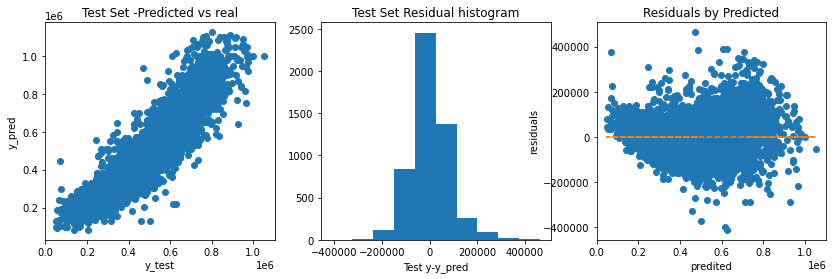

In [2784]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

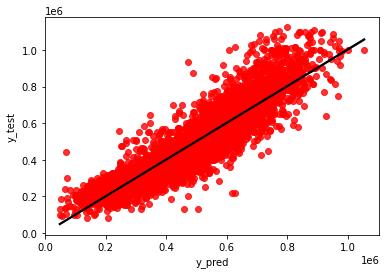

In [2785]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [2786]:
MSE = mse(y_test, y_pred)
MSE

6456930960.928959

In [2787]:
RMSE = math.sqrt(MSE)
RMSE

80355.03071326

In [2788]:
MAE = mae(y_test, y_pred)
MAE

59196.99470354953

In [2789]:
R21 = r2_score(y_test, y_pred)
R21

0.8325599319226056

In [2790]:
Adj_r2_1 = 1-(1-R21)*(3207-1)/(3207-7-1)
Adj_r2_1

0.832193542276922

In [2791]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [2792]:
features_importances

,Attribute,Importance
2,sqft_living,1.065490e+16
9,sqft_above,1.029271e+16
10,sqft_basement,5.954027e+15
55,dmy_98103,7.555834e+13
62,dmy_98115,7.117856e+13
...,...,...
5,waterfront,8.356864e+03
1,bathrooms,5.016752e+03
12,sqft_lot15,3.619375e+03
0,bedrooms,2.254107e+03


In [ ]:
#nu_zip=len(house_df['zipcode'].unique())
#dummy_zips = list(np.zeros(n_zip))

In [ ]:
#list_zips = list(house_df['zipcode'].unique())

In [ ]:
#choosez_zip=input('Enter your zip:')
#choosez_zip=98058

In [ ]:
#index_zip=list_zips.index(f'{choosez_zip}')

In [ ]:
#dummy_zips[index_zip]=1
#dummy_zips

In [ ]:
# 2,1,1800,5182,1,0,0,3,6,900,900,1570,5876,98008

In [ ]:
nu_bedrooms=input('insert bedrooms')
nu_bathrooms=input('insert bathrooms')
nu_sqft_living=input('insert sqft_living')
nu_sqft_lot=input('insert sqft_lot')
nu_floors=input('insert floors')
nu_waterfront=input('insert waterfront')
nu_view=input('insert view')
nu_condition=input('insert condition')
nu_grade=input('insert grade')
nu_sqft_above=input('insert sqft_above')
nu_sqft_basement=input('insert sqft_basement')
nu_sqft_living15=input('insert sqft_living15')
nu_sqft_lot15=input('insert sqft_lot15')
choosez_zip=int(input('Enter your zip:'))

insert bedrooms2
insert bathrooms1
insert sqft_living1800
insert sqft_lot4000
insert floors2
insert waterfront1
insert view1
insert condition4


In [2872]:
ziplist = [int(x) for x in ziplist]
dummyziplist = []
for i in ziplist:
    if i == choosez_zip:
        dummyziplist.append(1)
    else:
        dummyziplist.append(0)

<b> prediction new Y

In [2873]:
## new record 
new_data=[nu_bedrooms,nu_bathrooms,nu_sqft_living,nu_sqft_lot,nu_floors,nu_waterfront,nu_view,nu_condition,nu_grade,nu_sqft_above,nu_sqft_basement,nu_sqft_living15,nu_sqft_lot15]
new_data.extend(dummyziplist)
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,83))

/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<b> Estimated Price:

In [2874]:
model.predict(new_data_scaled)

array([418977.31670483])

In [ ]:
new_data.extend(dummyziplist)

In [2821]:
new_data

In [2837]:
ziplist = [int(x) for x in ziplist]

In [2838]:
choosez_zip=int(input('Enter your zip:'))

Enter your zip:98045


In [2810]:
#type(choosez_zip)

In [2839]:
ziplist = [int(x) for x in ziplist]
dummyziplist = []
for i in ziplist:
    if i == choosez_zip:
        dummyziplist.append(1)
    else:
        dummyziplist.append(0)

In [2842]:
dummyziplist

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [2846]:
filename="house_d.csv"

In [2847]:
house_df.to_csv(filename)